<a href="https://colab.research.google.com/github/BurakCakan/BurakCakan-MATH555EGitHub/blob/main/Burak_MATH555_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

**DATASET DESCRIPTION**

In [6]:
#Libraries:
from google.colab import auth
from google.cloud import bigquery
import json
import requests
import os

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score


In [4]:
auth.authenticate_user()
print('Authenticated')

Authenticated


In [5]:
def getClient():
    client = bigquery.Client()
    return client

def executeQuery(query):
    client = getClient()
    query_job = client.query(query)
    results = query_job.result()
    return results

project_id = 'dsm-exec-dp'

client = bigquery.Client(project=project_id)

os.environ["GOOGLE_CLOUD_PROJECT"] = project_id

def getClient():
    client = bigquery.Client()
    return client

def executeQuery(query):
    client = getClient()
    query_job = client.query(query).to_dataframe()
   # results = query_job.result()
    return query_job


In [3]:
ml_query='''SELECT order_number,
                   order_date,
                   Product_Category,
                   Business_Main_Category,
                   order_price,
                   customer_number,
                   custoner_gender,
                   customer_age,
                   elite_member_flag,
                   saved_card_flag,
                   BRAND_NAME
             FROM `dsm-data.dwh_reader.burak_ml_data_new_order3`'''

results=executeQuery(ml_query)
dataset=pd.DataFrame(results)
dataset.head()

**Dataset Description**

Bu dataset (dsm-data.dwh_reader.burak_ml_data_new_order2) trendyol.com sitesi üzerinden 2021-01-02 tarihinden
2021-04-15 tarihine kadarki aralıkta toplamda verdiği sipariş sayısı 50+ olan müşterilerin yine aynı aralıkta her bir siparişlerinde aldıkları ürünleri gösteren tablodur. (Tablo boyutu işlenemeyecek kadar büyük olduğu için her bir siparişteki en yüksek fiyatlı ürünü dahil ettim. Tüm siparişleri aldığımda tablo boyutu 50+ GB oluyordu. RAM'in yeteceği sınırlara düşürdüm.)

Table size: 676.58 MB

Number of instances: 6,959,857

Number of attributes: 11

**Attribute Description:**

order_number - It is the unique identification number for each order given by the customer. (It is hashed for the information security.)

order_date - Specifies the date of the order given by the customer

Product_Category - Category of the product. It is like a sub category of Business main category.

Brand_hash - Hashed brand of the product.

Business_Main_Category - Main category of the purchased products

customer_number - The unique identification number for each customer. (It is hashed for the information security.)

customer_gender - Gender of the customer

customer_age - Age of the customer

elite_member_flag - Elite status of the customer (1 is elite customer, 0 is not). To be an elite customer in last 3 months you have to order more than 3000 TL in total.

saved_card_flag - It shows whether the customer saved his credit card information to the site. (1 is yes, 0 is no)

order_price - It is the total price paid for the specified product in the specified order_number.

In [7]:
print(results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6959857 entries, 0 to 6959856
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_number            int64  
 1   order_date              object 
 2   Product_Category        object 
 3   Business_Main_Category  object 
 4   order_price             float64
 5   customer_number         int64  
 6   custoner_gender         object 
 7   customer_age            object 
 8   elite_member_flag       int64  
 9   saved_card_flag         int64  
 10  BRAND_NAME              object 
dtypes: float64(1), int64(4), object(6)
memory usage: 584.1+ MB
None


Attribute Values

order_number - Discrete data with 6959857 distinct orders.

order_date - Starting from 2021-01-02 to 2021-04-15 contains continous data.

product_category - Discrete data with 2773 distinct categories. Some of them are 'Çocuk Öykü','Pantolon','Sweatshirt' etc.

brand_hash - Discrete data with 63808 distinct brands.

Business_Main_Category - Discrete data with 17 distinct categories. They are FMCG, Branded Tekstil, UNKNOWN, Kozmetik, Ev, Private Label, Aksesuar & Saat & Gözlük, Çocuk, GM, GAS, Ayakkabı & Çanta, Consumer Electronics,
Mobilya, Home Electronics, Digital Goods, Aksesuar & Lüks, Kadın Tekstil.

order_price - Total price paid for each product is nearly 1,5x10^9 TL. Minimum value is 0.1 TL and the maximum value is 472991.2 TL.

customer_number - Discrete data with 83834 distinct customers.

customer_gender - Discrete data for 2 values as Bay(Man) and Bayan(Woman).

customer_age - Range between -47 and 2020. This information is most probably false.

elite_member_flag - Discrete data for 2 values as 0 as not elite and 1 as elite member.

saved_card_flag - Discrete data for 2 values as 0 and 1.

rn - it is a dummy column, meaningless.

In [10]:
#Sampling

sample_dataset = dataset.sample(frac=0.01, random_state=1)

print(len(sample_dataset))

69599


In [12]:
indeps = ['Product_Category','BRAND_NAME','Business_Main_Category']
classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy')

xs = pd.get_dummies(sample_dataset[indeps])
ys = sample_dataset['custoner_gender']


In [13]:
classifier.fit(xs,ys)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(930.0, 1585.5, 'BRAND_NAME_Bambi <= 0.5\nentropy = 0.544\nsamples = 69599\nvalue = [7477, 61704, 418]\nclass = Bayan'),
 Text(465.0, 1132.5, 'Business_Main_Category_Ev <= 0.5\nentropy = 0.512\nsamples = 68665\nvalue = [6662, 61586, 417]\nclass = Bayan'),
 Text(232.5, 679.5, 'BRAND_NAME_TRENDYOLMİLLA <= 0.5\nentropy = 0.523\nsamples = 60063\nvalue = [6064, 53643, 356]\nclass = Bayan'),
 Text(116.25, 226.5, 'entropy = 0.536\nsamples = 55171\nvalue = [5758, 49075, 338]\nclass = Bayan'),
 Text(348.75, 226.5, 'entropy = 0.372\nsamples = 4892\nvalue = [306, 4568, 18]\nclass = Bayan'),
 Text(697.5, 679.5, 'BRAND_NAME_Esse Home <= 0.5\nentropy = 0.424\nsamples = 8602\nvalue = [598, 7943, 61]\nclass = Bayan'),
 Text(581.25, 226.5, 'entropy = 0.422\nsamples = 8593\nvalue = [592, 7940, 61]\nclass = Bayan'),
 Text(813.75, 226.5, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3, 0]\nclass = Bay'),
 Text(1395.0, 1132.5, 'Product_Category_Bot & Bootie <= 0.5\nentropy = 0.559\nsamples = 934\nvalue =

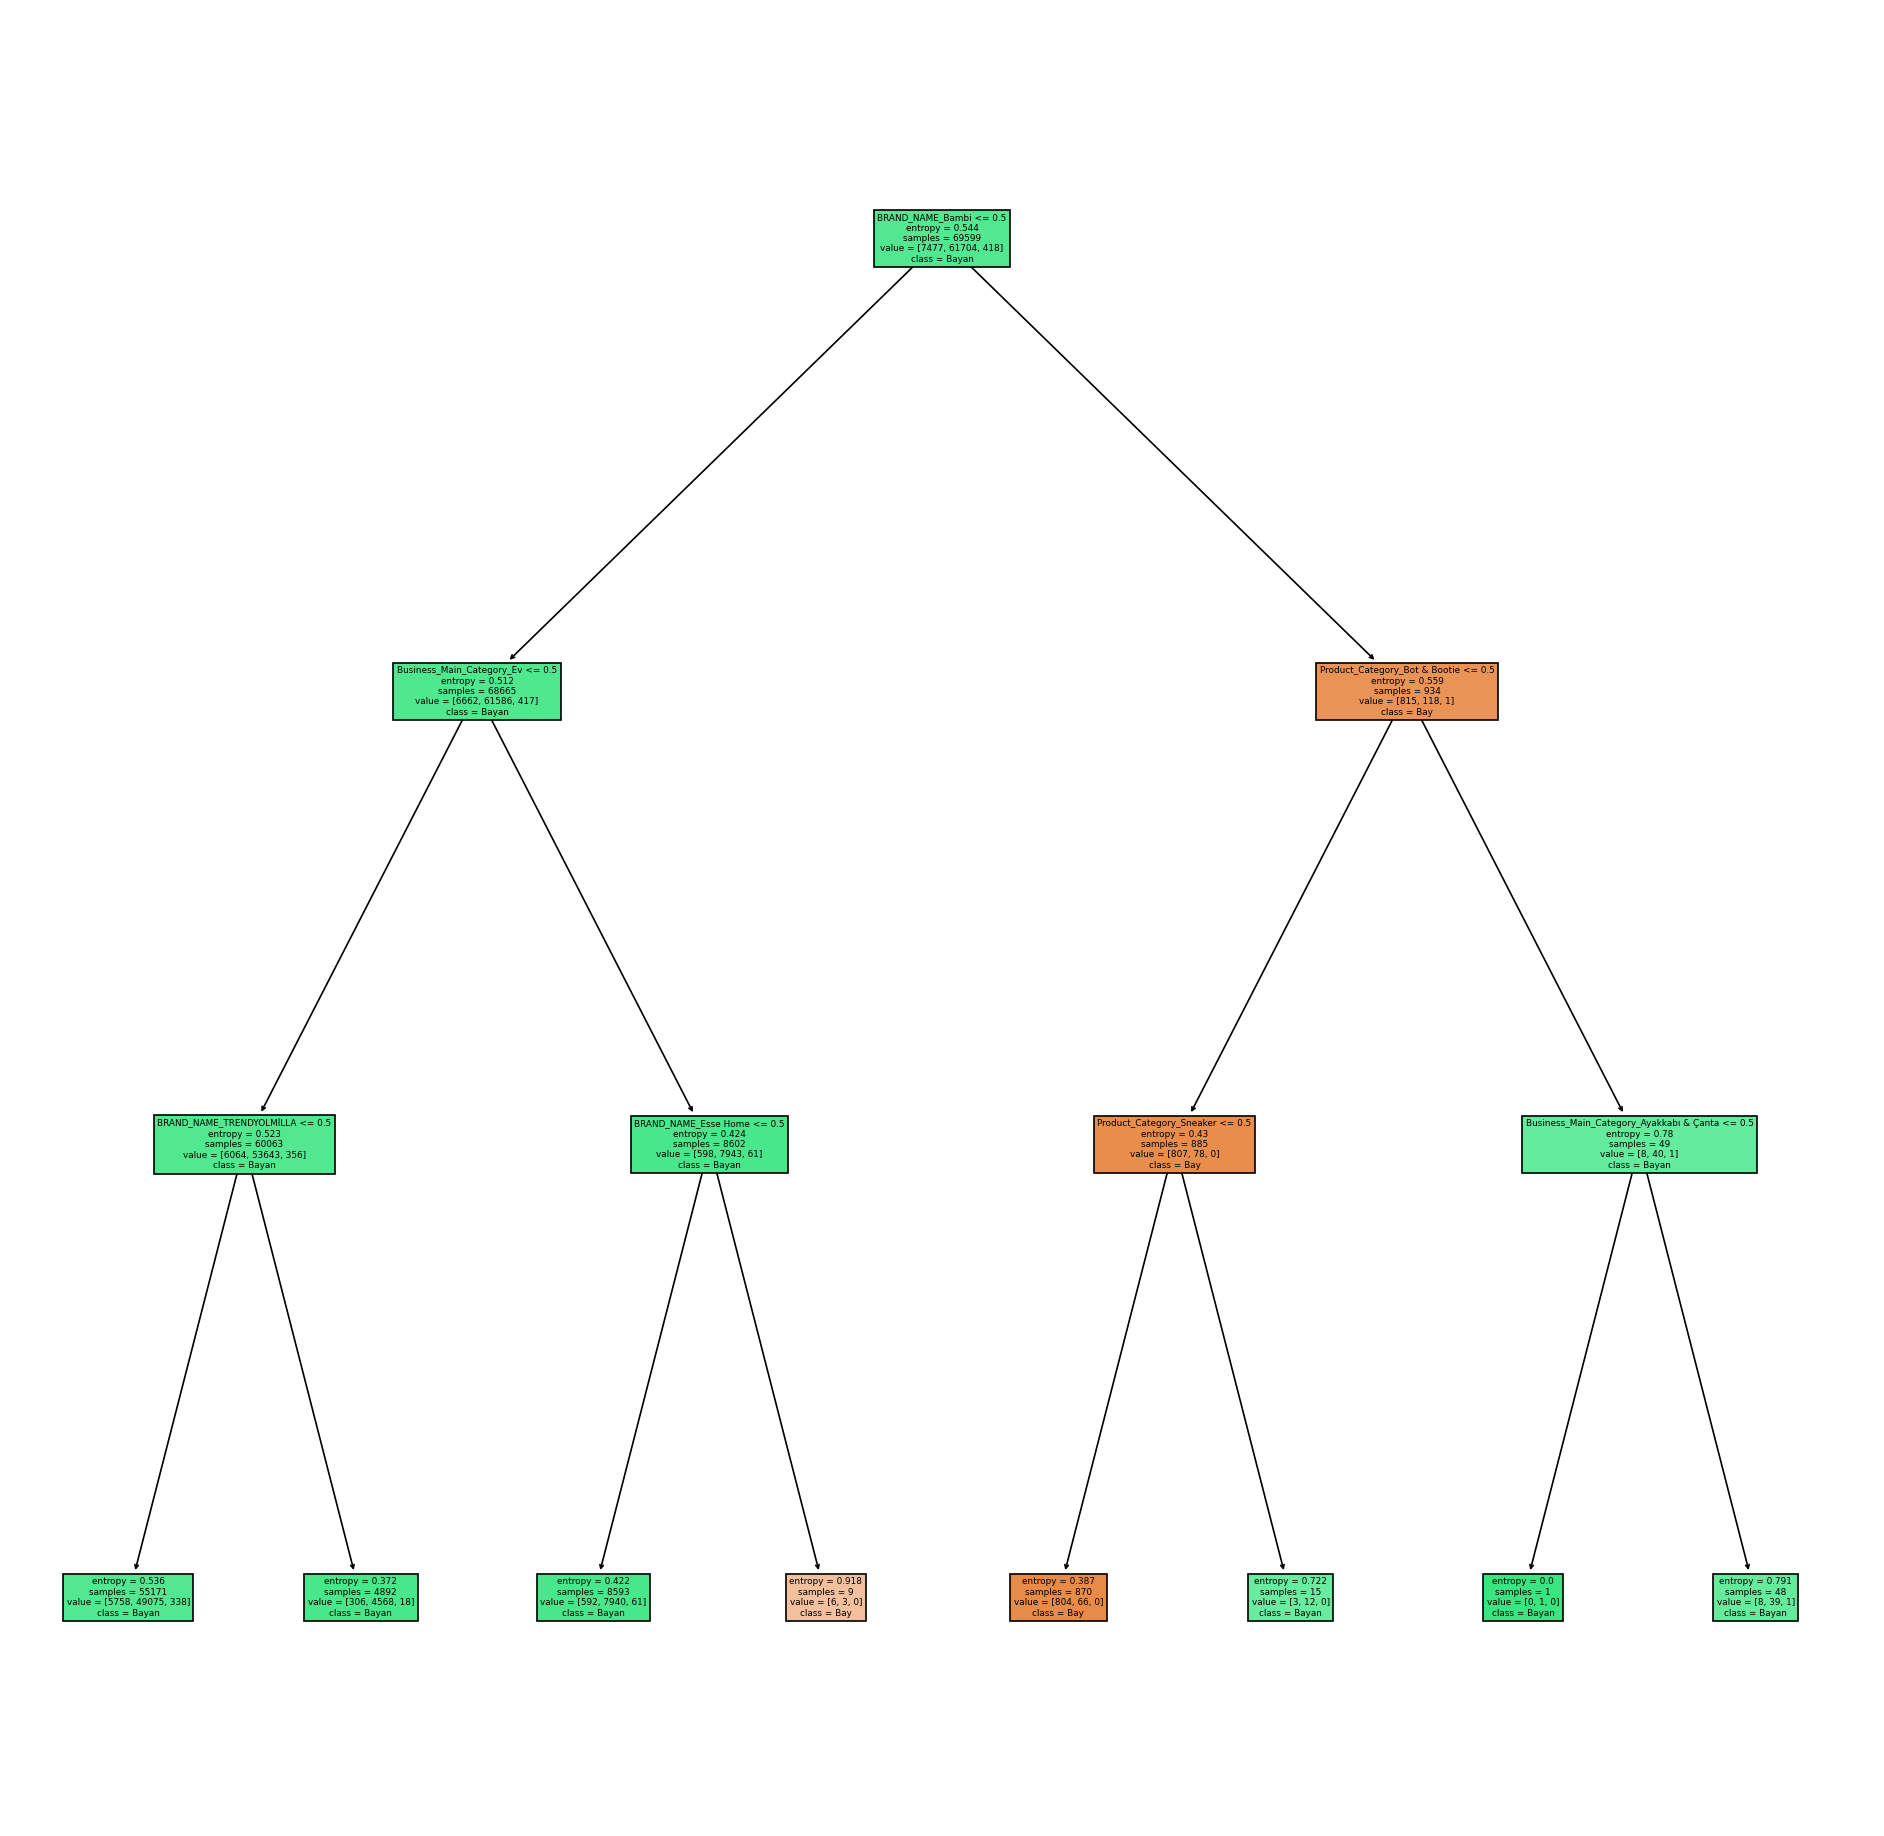

In [14]:
plt.figure(figsize=(20, 20), dpi=120)
tree.plot_tree(classifier,
               feature_names=xs.columns,
               class_names=np.unique(sample_dataset['custoner_gender']),
               filled = True)

There are 3 distinct values for customer gender which are BAY, BAYAN and UNKNOWN.
According to the plot tree above, there is only one homogenious node/region. The gender is Bayan when; 
- BRAND_NAME is Bambi 
- Product _Category is Bot&Bootie
- Business_Main_Category is not Ayakkabı&Çanta

With a class of Bayan with the entropy of 0.

But the sample size is 1 in that situation. This can point overfitting in the tree. As a result, there is no clear partition at that model.

In [16]:
sample_dataset['elite_member_flag']=sample_dataset['elite_member_flag'].astype('string')
indeps = ['Product_Category','BRAND_NAME','Business_Main_Category']
classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy')



In [17]:
xs = pd.get_dummies(sample_dataset[indeps])
ys = sample_dataset['elite_member_flag']

classifier.fit(xs,ys)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(930.0, 1585.5, 'BRAND_NAME_Bambi <= 0.5\nentropy = 0.995\nsamples = 69599\nvalue = [37828, 31771]\nclass = 0'),
 Text(465.0, 1132.5, 'Business_Main_Category_FMCG <= 0.5\nentropy = 0.996\nsamples = 68665\nvalue = [36964, 31701]\nclass = 0'),
 Text(232.5, 679.5, 'Business_Main_Category_Branded Tekstil <= 0.5\nentropy = 0.998\nsamples = 55192\nvalue = [28898, 26294]\nclass = 0'),
 Text(116.25, 226.5, 'entropy = 0.996\nsamples = 40327\nvalue = [21615, 18712]\nclass = 0'),
 Text(348.75, 226.5, 'entropy = 1.0\nsamples = 14865\nvalue = [7283, 7582]\nclass = 1'),
 Text(697.5, 679.5, 'Product_Category_Sebze <= 0.5\nentropy = 0.972\nsamples = 13473\nvalue = [8066, 5407]\nclass = 0'),
 Text(581.25, 226.5, 'entropy = 0.978\nsamples = 12173\nvalue = [7148, 5025]\nclass = 0'),
 Text(813.75, 226.5, 'entropy = 0.874\nsamples = 1300\nvalue = [918, 382]\nclass = 0'),
 Text(1395.0, 1132.5, 'Product_Category_Bot & Bootie <= 0.5\nentropy = 0.384\nsamples = 934\nvalue = [864, 70]\nclass = 0'),
 Text(1

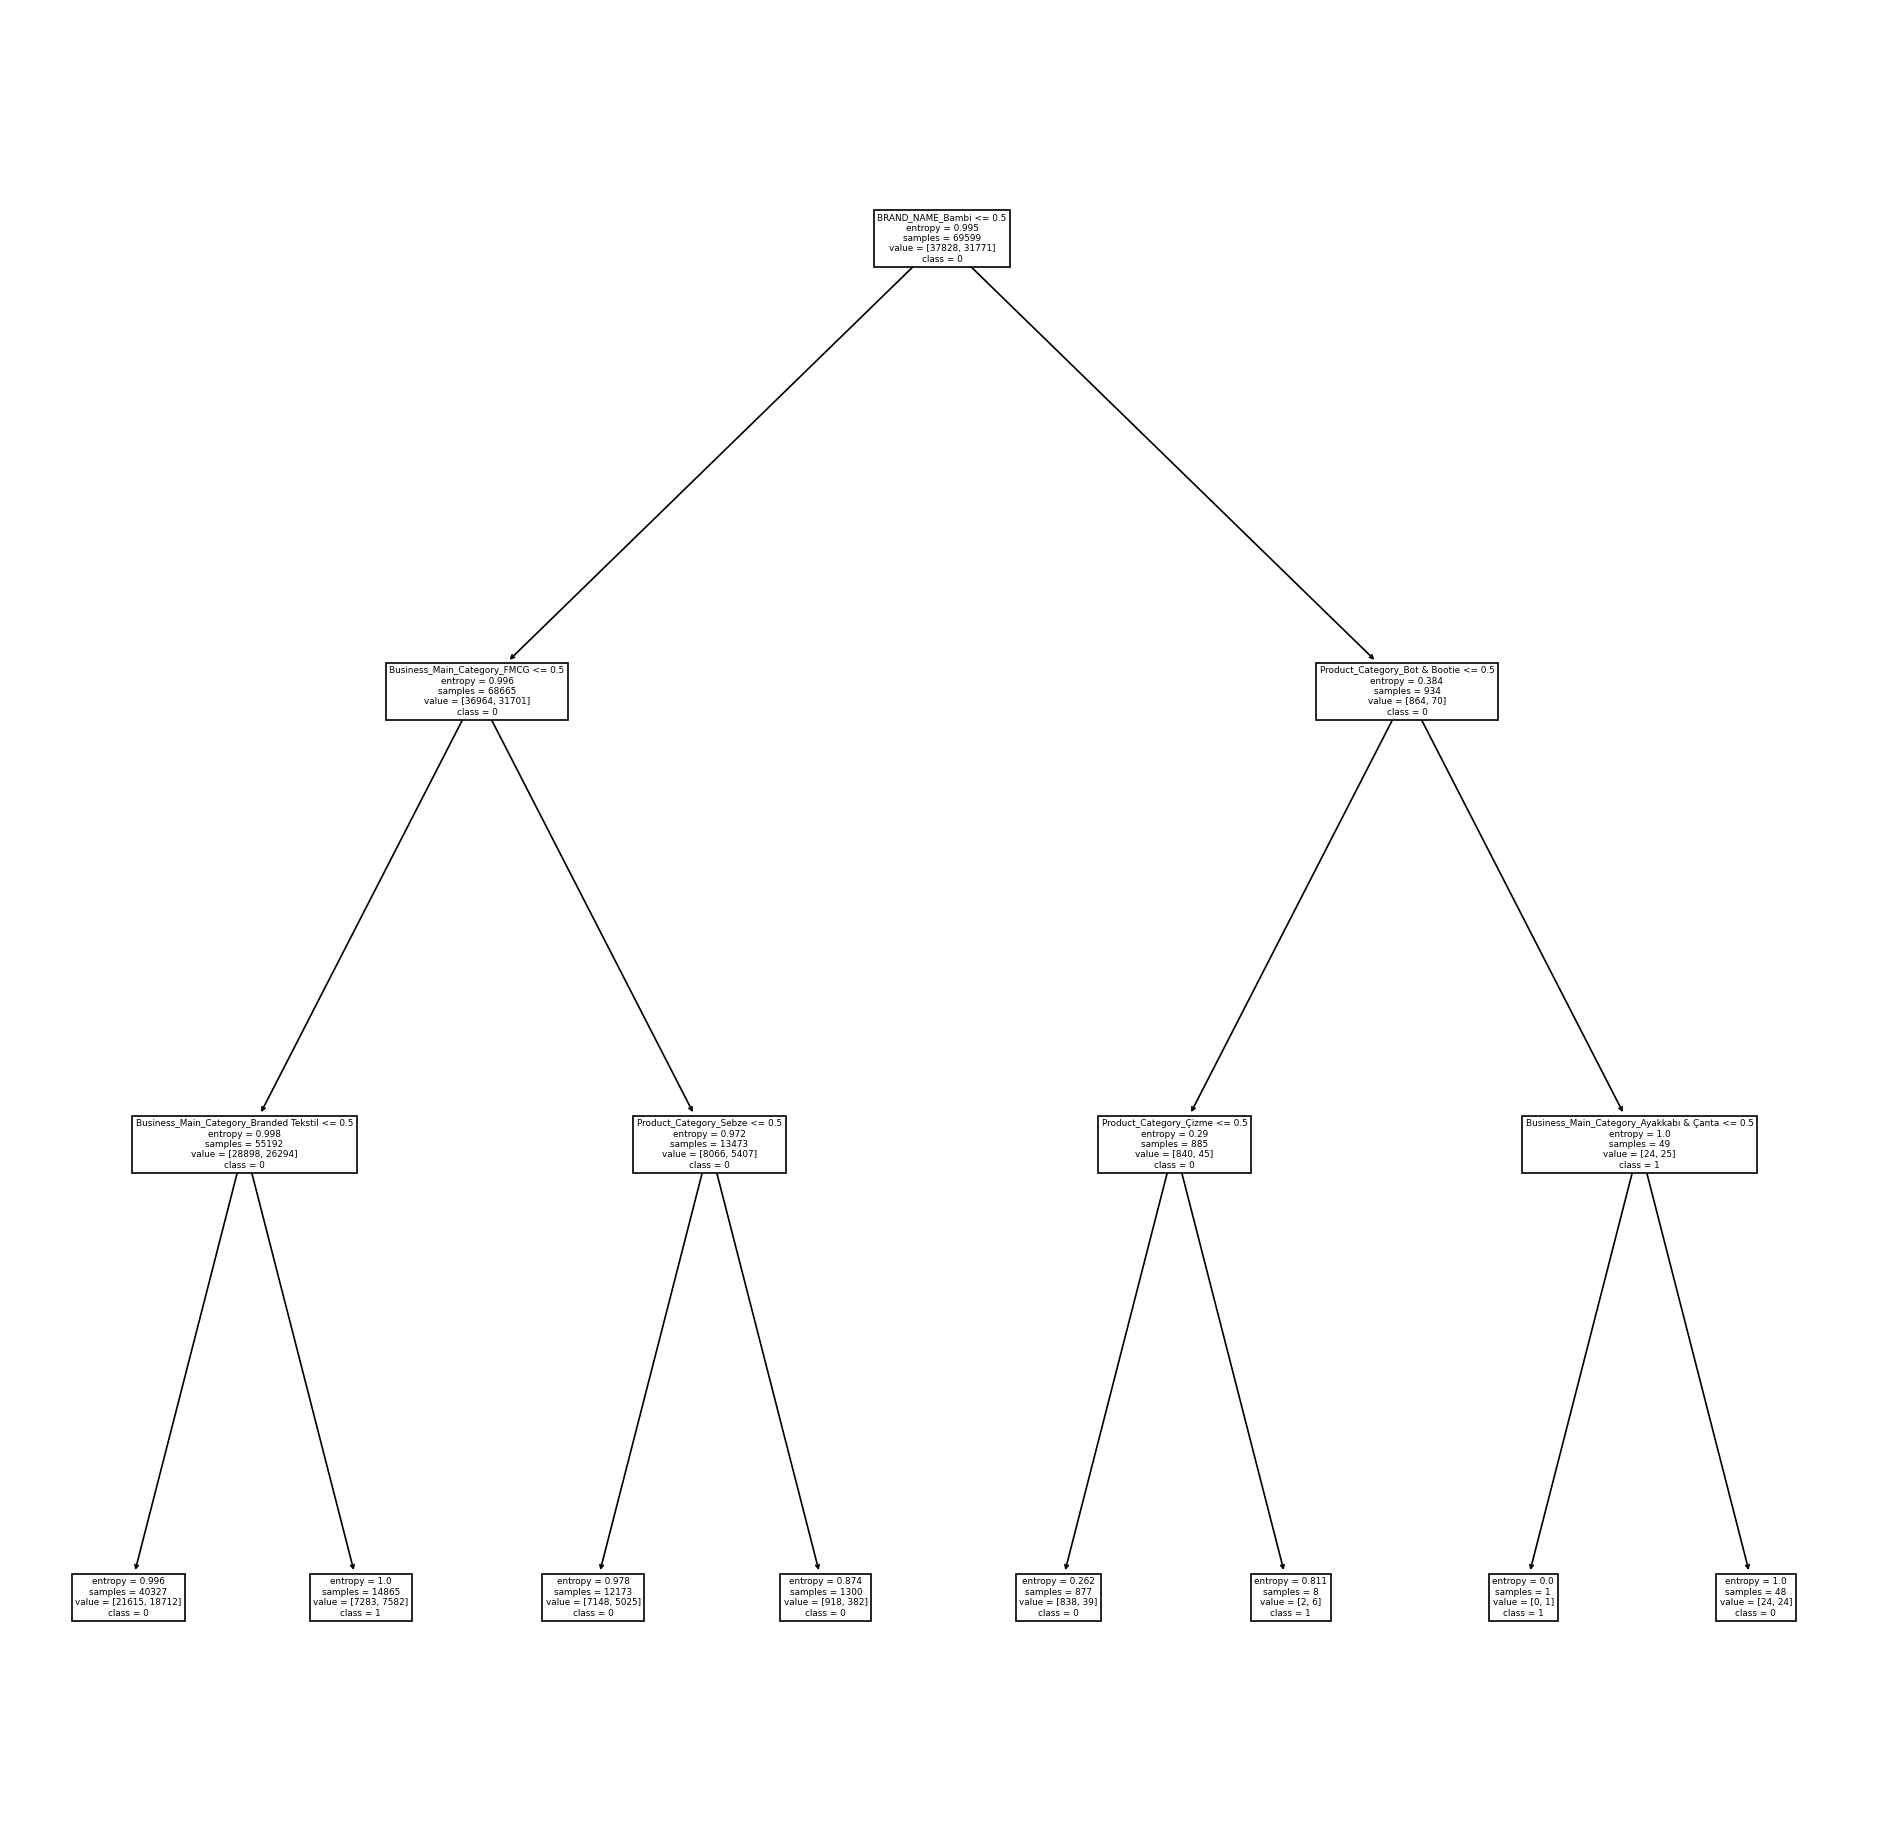

In [18]:
plt.figure(figsize=(20, 20), dpi=120)
tree.plot_tree(classifier,
               feature_names=xs.columns,
               class_names=np.unique(sample_dataset['elite_member_flag']),
               filled = False)

The same situation is valid for this model also. 

[Text(930.0, 1585.5, 'BRAND_NAME_Bambi <= 0.5\nentropy = 0.875\nsamples = 34799\nvalue = [10257, 24542]\nclass = 1'),
 Text(465.0, 1132.5, 'elite_member_flag <= 0.5\nentropy = 0.864\nsamples = 34335\nvalue = [9829, 24506]\nclass = 1'),
 Text(232.5, 679.5, 'custoner_gender_Bayan <= 0.5\nentropy = 0.904\nsamples = 18467\nvalue = [5907, 12560]\nclass = 1'),
 Text(116.25, 226.5, 'entropy = 0.971\nsamples = 1891\nvalue = [756, 1135]\nclass = 1'),
 Text(348.75, 226.5, 'entropy = 0.894\nsamples = 16576\nvalue = [5151, 11425]\nclass = 1'),
 Text(697.5, 679.5, 'custoner_gender_Bayan <= 0.5\nentropy = 0.807\nsamples = 15868\nvalue = [3922, 11946]\nclass = 1'),
 Text(581.25, 226.5, 'entropy = 0.654\nsamples = 1643\nvalue = [277, 1366]\nclass = 1'),
 Text(813.75, 226.5, 'entropy = 0.821\nsamples = 14225\nvalue = [3645, 10580]\nclass = 1'),
 Text(1395.0, 1132.5, 'custoner_gender_Bay <= 0.5\nentropy = 0.394\nsamples = 464\nvalue = [428, 36]\nclass = 0'),
 Text(1162.5, 679.5, 'order_price <= 65.74\ne

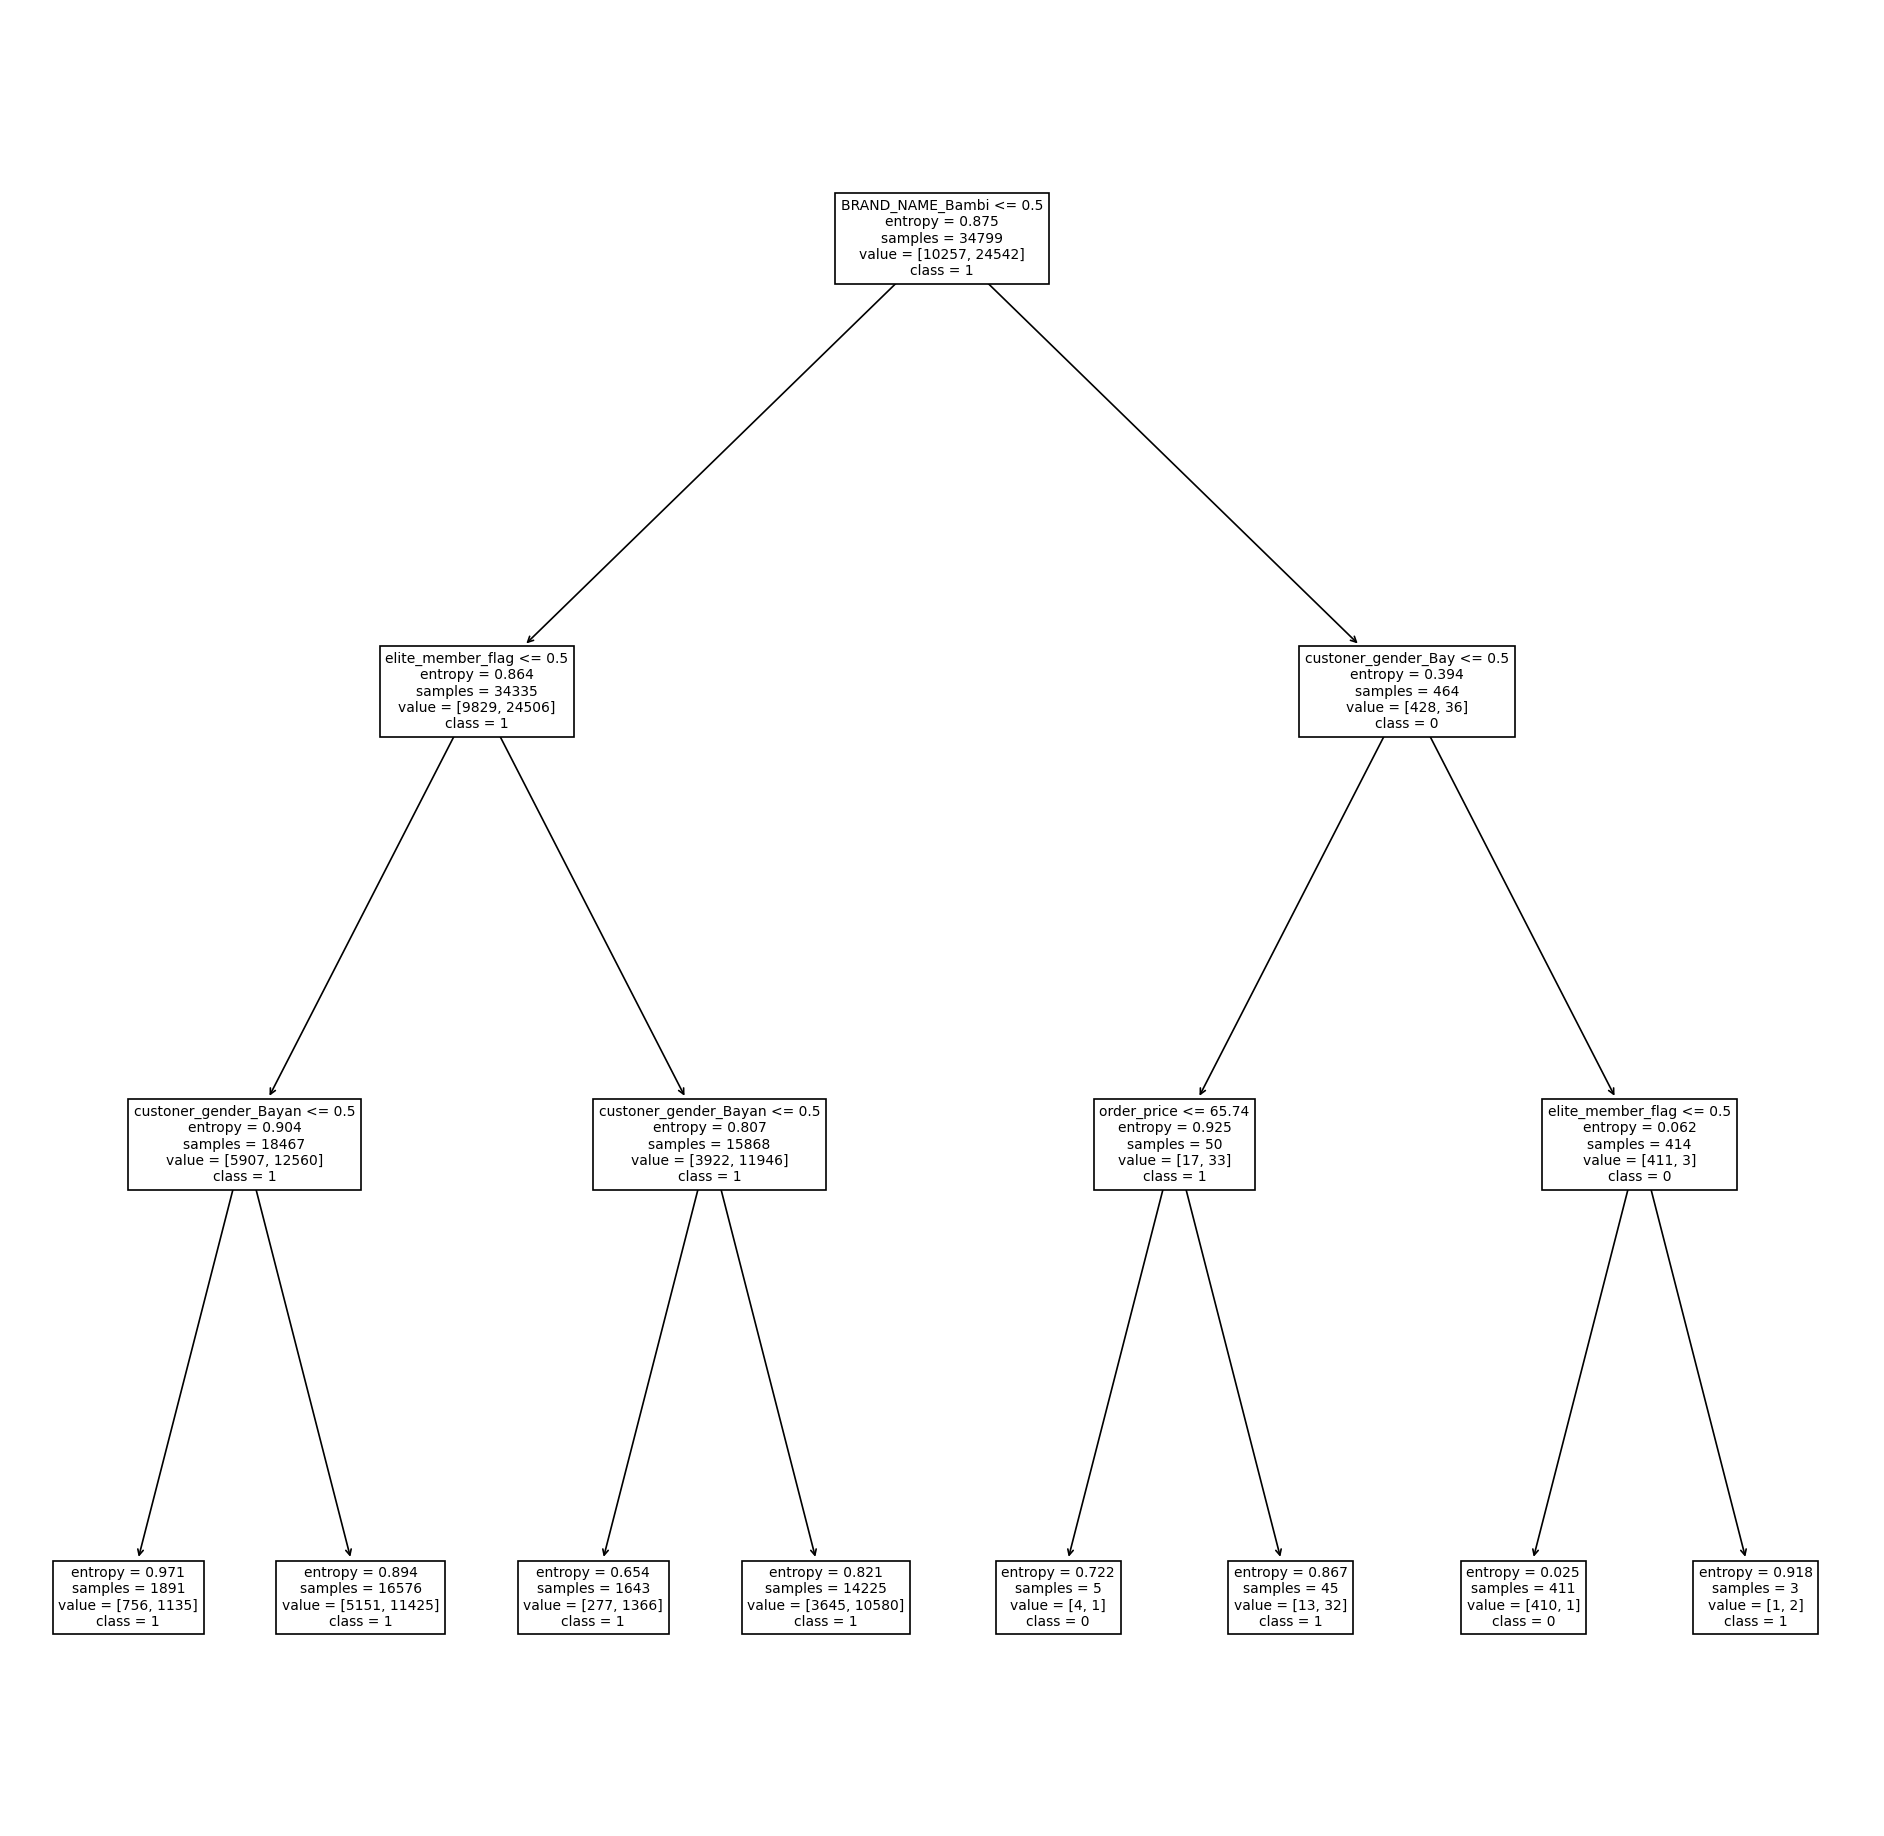

In [6]:
sample_dataset = dataset.sample(frac=0.005, random_state=1)
sample_dataset['elite_member_flag']=sample_dataset['elite_member_flag'].astype('string')
sample_dataset['saved_card_flag']=sample_dataset['saved_card_flag'].astype('string')

indeps = ['Product_Category','BRAND_NAME','Business_Main_Category','elite_member_flag','order_price','custoner_gender']
classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy')
xs = pd.get_dummies(sample_dataset[indeps])
ys = sample_dataset['saved_card_flag']

classifier.fit(xs,ys)

plt.figure(figsize=(20, 20), dpi=120)
tree.plot_tree(classifier,
               feature_names=xs.columns,
               class_names=np.unique(sample_dataset['saved_card_flag']),
               filled = False)

Like the trees above, this tree couldn't also have a good partition. There are some very homogenious situations when: 
- Brand name is Bambi.
- Customer gender is Bay
With a class of 0 which means "not saving credit card" with entropy value of 0.062.
And as an addition to above node, when;
- Elite member flag is 0 which means not an elite member.
With a class of 0 which means "not saving credit card" with entropy value of 0.025.


```
-- google cloud ortamında çalıştırılan sorgu:
create or replace table `dsm-data.dwh_reader.burak_ml_dataset` as
select * from `dsm-data.dwh_reader.burak_ml_data_new_order3` ab
where ab.custoner_gender in ('Bay','Bayan') and ab.BRAND_NAME is not null ;
```

Datasette yukarıdaki gibi bir güncelleme yaptım. Bu güncellemenin nedeni de UNKNOWN olarak gelen gender ve null olarak gelen BRAND_NAME kayıtlarının dataseti ve modeli etkilemesini engellemek istedim. Yeni dataset ile overfittingi engellemek adına pruning de yaparak yeni model kuracağım.


In [7]:
ml_query='''SELECT order_number,
                   order_date,
                   Product_Category,
                   Business_Main_Category,
                   order_price,
                   customer_number,
                   custoner_gender,
                   customer_age,
                   elite_member_flag,
                   saved_card_flag,
                   BRAND_NAME
             FROM `dsm-data.dwh_reader.burak_ml_dataset`'''

results=executeQuery(ml_query)

dataset=pd.DataFrame(results)

sample_dataset = dataset.sample(frac=0.001, random_state=1)
sample_dataset['elite_member_flag']=sample_dataset['elite_member_flag'].astype('string')
sample_dataset['saved_card_flag']=sample_dataset['saved_card_flag'].astype('string')

indeps = ['Product_Category','BRAND_NAME','Business_Main_Category','elite_member_flag','order_price','custoner_gender']
ys = sample_dataset['saved_card_flag']
xs = sample_dataset[indeps]
xs=pd.get_dummies(xs)

xtrain,xtest,ytrain,ytest = train_test_split(xs,ys)

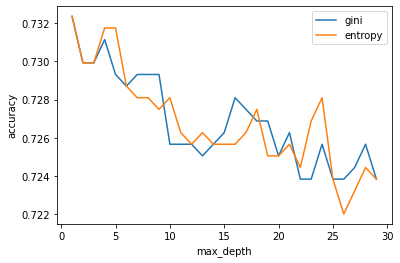

In [11]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 #gini_index:
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(xtrain, ytrain)
 pred = dtree.predict(xtest)
 acc_gini.append(accuracy_score(ytest, pred))
 #entropy:
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(xtrain, ytrain)
 pred = dtree.predict(xtest)
 acc_entropy.append(accuracy_score(ytest, pred))

 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

According to the plot above, entropy has a sligthly better performance than gini index. Depth of 5 in entropy seems like the best performance. I will plot tree according to this information in order to prevent overfitting.

Accuracy:  0.7317518248175182


[Text(1033.3333333333333, 1661.0, 'BRAND_NAME_Bambi <= 0.5\nentropy = 0.871\nsamples = 4929\nvalue = [1438, 3491]\nclass = 1'),
 Text(620.0, 1359.0, 'Product_Category_Hırka <= 0.5\nentropy = 0.857\nsamples = 4842\nvalue = [1360, 3482]\nclass = 1'),
 Text(413.3333333333333, 1057.0, 'Product_Category_Saç Kremi <= 0.5\nentropy = 0.854\nsamples = 4804\nvalue = [1339, 3465]\nclass = 1'),
 Text(310.0, 755.0, 'Product_Category_Slip <= 0.5\nentropy = 0.855\nsamples = 4787\nvalue = [1339, 3448]\nclass = 1'),
 Text(206.66666666666666, 453.0, 'Product_Category_Diğer Sağlık Ürünleri <= 0.5\nentropy = 0.854\nsamples = 4783\nvalue = [1335, 3448]\nclass = 1'),
 Text(103.33333333333333, 151.0, 'entropy = 0.855\nsamples = 4771\nvalue = [1335, 3436]\nclass = 1'),
 Text(310.0, 151.0, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = 1'),
 Text(413.3333333333333, 453.0, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(516.6666666666666, 755.0, 'entropy = 0.0\nsamples = 17\nvalue = [0, 

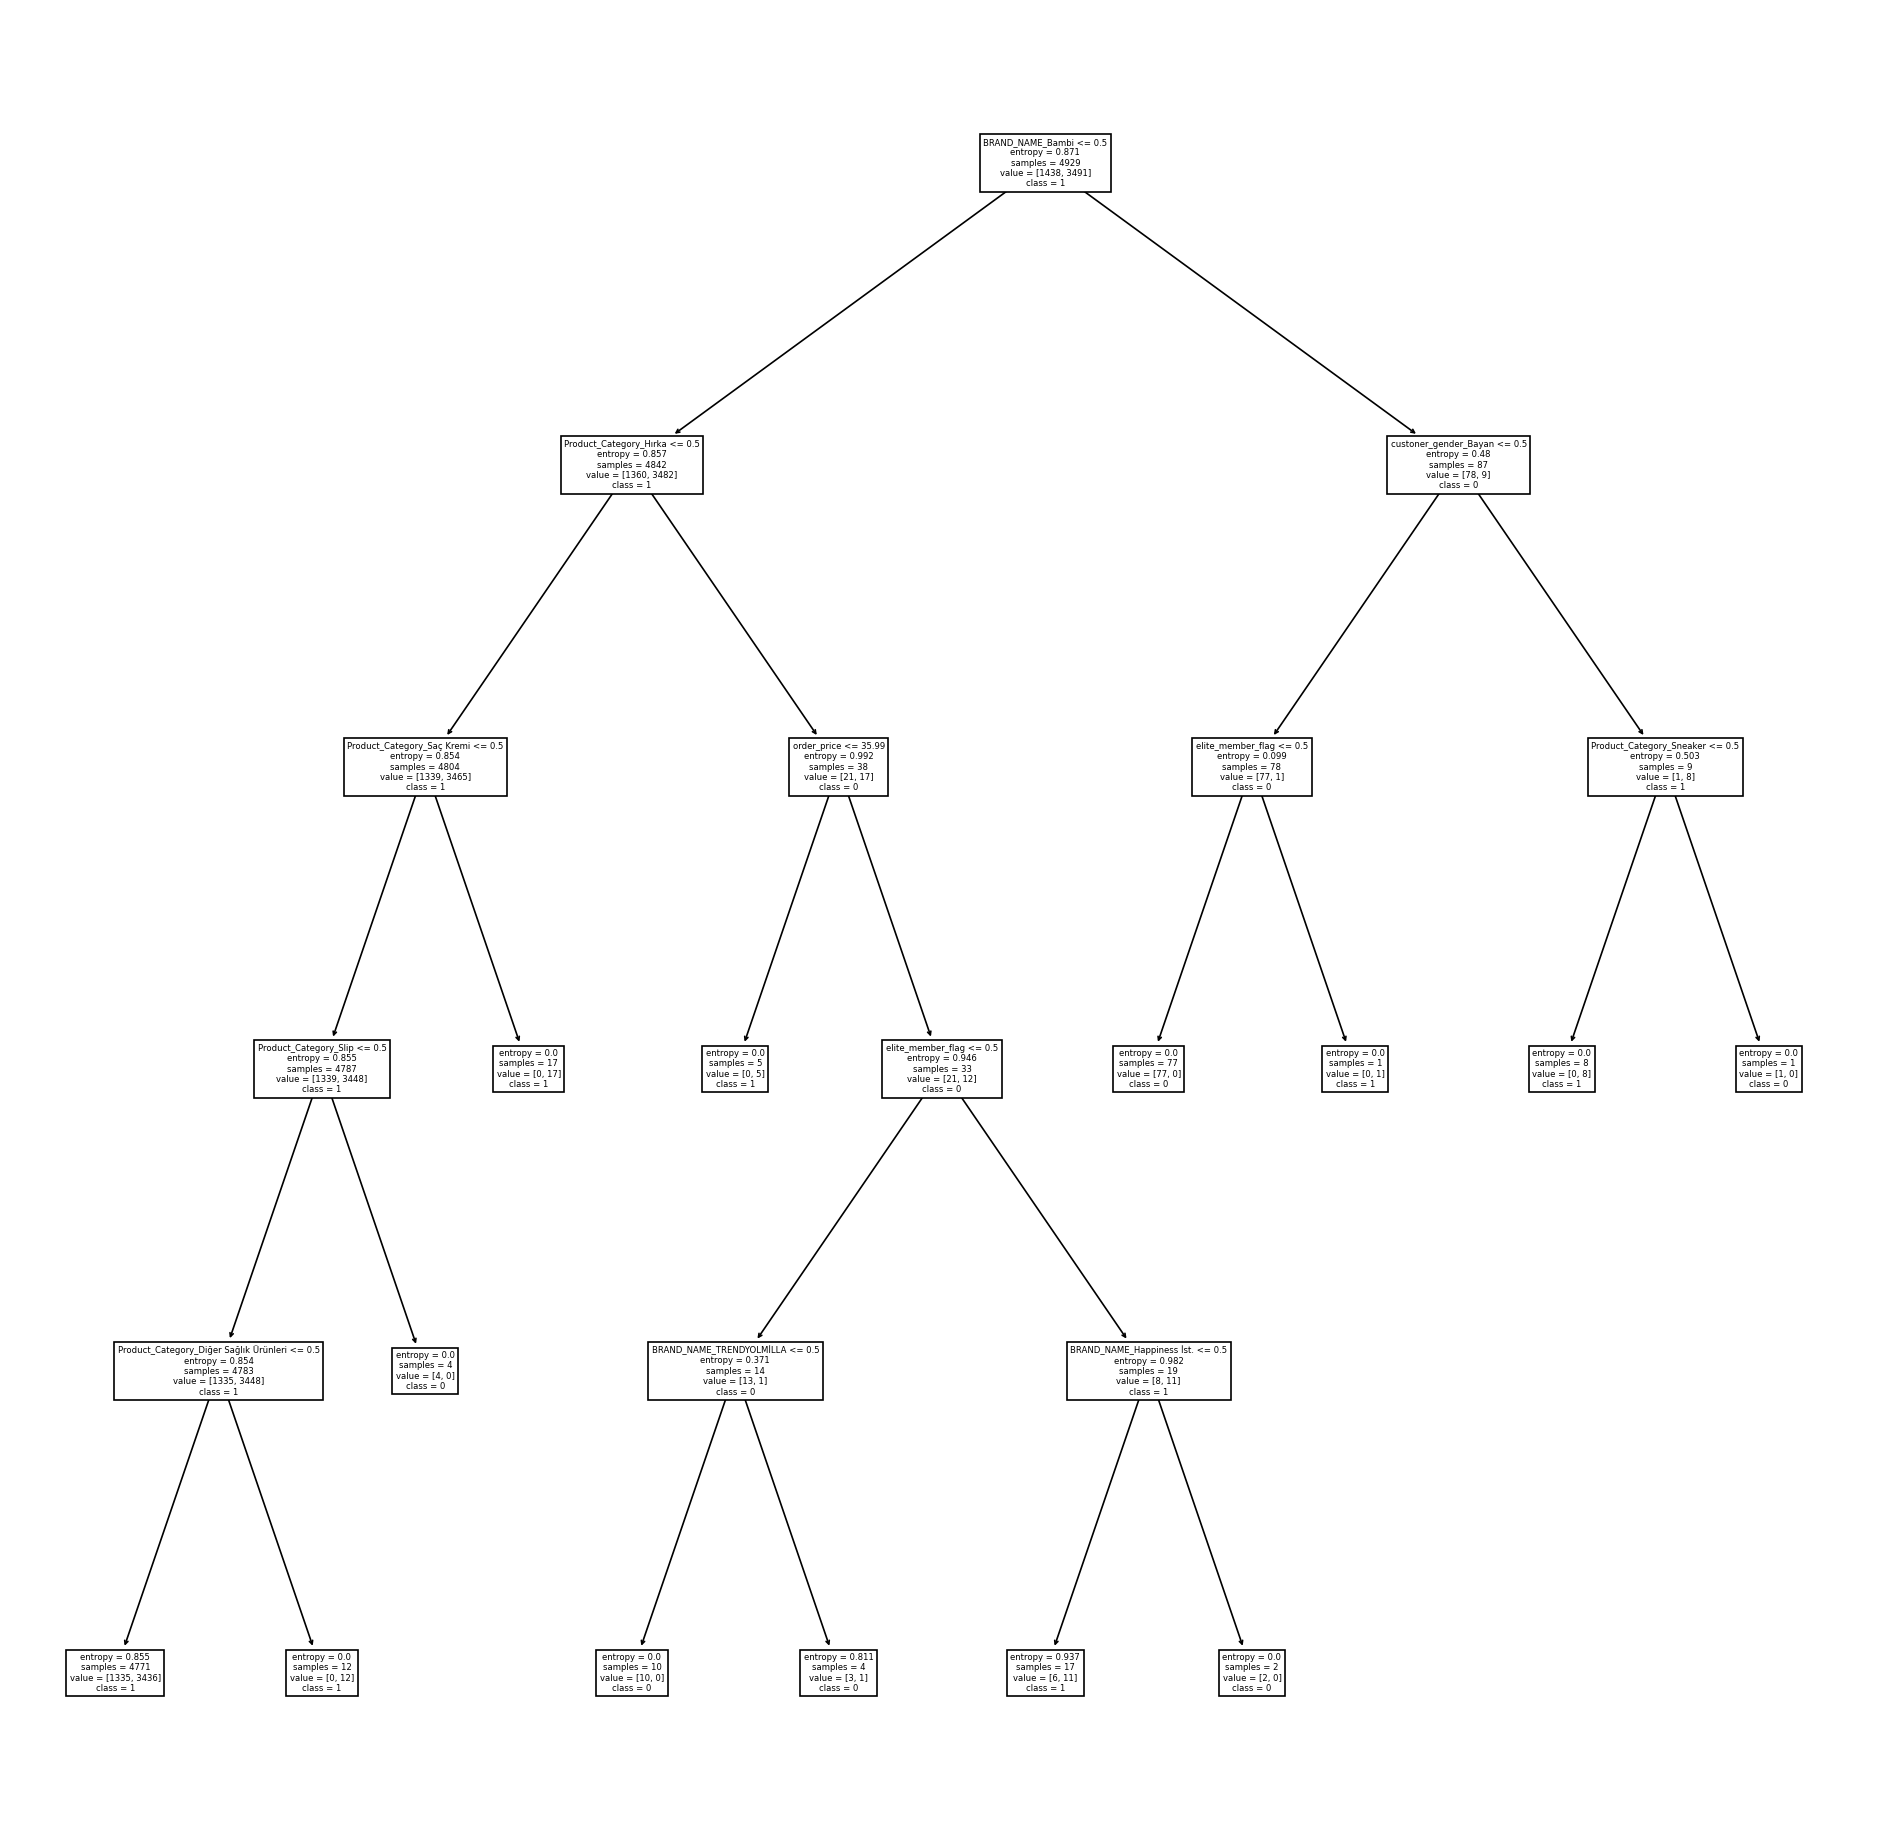

In [12]:
#burası updatelenecek
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree.fit(xtrain, ytrain)

pred = dtree.predict(xtest)
acc_score=accuracy_score(ytest, pred)

print('Accuracy: ',acc_score)

plt.figure(figsize=(20, 20), dpi=120)
tree.plot_tree(dtree,
               feature_names=xtrain.columns,
               class_names=np.unique(sample_dataset['saved_card_flag']),
               filled = False)

I cannot say that tree is perfectly partitioned but there are better partitions in dataset in comparision with other tree plots. 

Very homogenious situations when: 

**1st main branch**
- Brand name is Bambi
- Customer gender is Bay

With a class of 0 which means "not saving credit card" with entropy value of 0.099 and sample of 78.

And as an addition to above node, when;
- Brand name is Bambi
- Customer gender is Bay
- Elite member flag is 0 which means not an elite member.

With a class of 0 which means "not saving credit card" with entropy value of 0 and a sample of 77.

- Brand name is Bambi
- Customer gender is Bay
- Elite member flag is 1 which means an elite member.

With a class of 1 which means "saving credit card" with entropy value of 0 and a sample of 1.

**2nd main branch**
- Brand name is not Bambi
- Product category is not Hırka
- Product Category is Saç Kremi

Result: entropy=0, sample=17 and class=1 (saves credit card)

- Brand name is not Bambi
- Product category is not Hırka
- Product Category is not Saç Kremi
- Product Category is Slip

Result: entropy=0, sample=4 and class=0 (don't save credit card)

- Brand name is not Bambi
- Product category is not Hırka
- Product Category is not Saç Kremi
- Product Category is not Slip
- Product Category is Diğer Sağlık Ürünleri

Result: entropy=0, sample=12 and class=1 (saves credit card)

- Brand name is not Bambi
- Product category is Hırka
- Order price <= 35.99

Result: entropy=0, sample=5 and class=1 (saves credit card)

- Brand name is not Bambi
- Product category is Hırka
- Order price > 35.99
- Elite member flag = 0 (Not an elite member)
- Brand name is not TrendyolMilla

Result: entropy=0, sample=10 and class=0 (don't save credit card)

- Brand name is not Bambi
- Product category is Hırka
- Order price > 35.99
- Elite member flag = 1 (Elite member)
- Brand name is not Happiness İst.

Result: entropy=0, sample=2 and class=0 (don't save credit card)